In [1]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.4 MB/s eta 0:00:00


In [2]:
import os
import sys
import glob
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import specgram

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"novruzjuvarlinski","key":"b41961130f4601adf80c7db0a39f156c"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# SAVEE

In [ ]:
!kaggle datasets download -d 'ejlok1/surrey-audiovisual-expressed-emotion-savee' -p '/content'

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 99% 106M/107M [00:06<00:00, 18.1MB/s]
100% 107M/107M [00:06<00:00, 18.1MB/s]


In [ ]:
!unzip -q '/content/surrey-audiovisual-expressed-emotion-savee.zip' -d '/content/SAVEE'

In [ ]:
!rm '/content/surrey-audiovisual-expressed-emotion-savee.zip'

In [ ]:
SAVEE = '/content/SAVEE'

In [ ]:
for dirpath, dirnames, filenames in os.walk(SAVEE):
  print(dirpath)
  print(filenames)

/content/SAVEE
[]
/content/SAVEE/ALL
['JE_sa14.wav', 'JK_h05.wav', 'KL_n25.wav', 'KL_d12.wav', 'KL_n28.wav', 'JE_n13.wav', 'JK_n25.wav', 'JE_f09.wav', 'JK_a08.wav', 'KL_h01.wav', 'JK_sa04.wav', 'JE_a08.wav', 'DC_d07.wav', 'JK_a14.wav', 'JE_su10.wav', 'JE_n29.wav', 'JK_n03.wav', 'DC_d15.wav', 'DC_n23.wav', 'JE_su01.wav', 'KL_h15.wav', 'JK_n05.wav', 'KL_su12.wav', 'KL_n05.wav', 'KL_su06.wav', 'JE_sa07.wav', 'JK_su09.wav', 'JE_h04.wav', 'DC_h03.wav', 'JE_d10.wav', 'JK_n13.wav', 'JK_sa12.wav', 'JE_su04.wav', 'DC_sa05.wav', 'KL_a03.wav', 'DC_a04.wav', 'KL_f03.wav', 'JE_su13.wav', 'JE_d03.wav', 'JE_sa10.wav', 'DC_sa11.wav', 'KL_n24.wav', 'JK_su07.wav', 'KL_n14.wav', 'JK_sa06.wav', 'DC_n11.wav', 'KL_n22.wav', 'KL_n10.wav', 'JE_n30.wav', 'KL_su07.wav', 'DC_a10.wav', 'JE_a02.wav', 'KL_f11.wav', 'DC_n27.wav', 'KL_d01.wav', 'DC_n22.wav', 'JE_sa09.wav', 'DC_su15.wav', 'DC_n09.wav', 'KL_d06.wav', 'DC_sa09.wav', 'KL_su14.wav', 'DC_a15.wav', 'JK_n24.wav', 'DC_n26.wav', 'JK_f11.wav', 'JE_n18.wav', 'JE

In [ ]:
for dirpath, dirnames, filenames in os.walk(SAVEE):
  if filenames:
    source_folder = dirpath
    for filename in os.listdir(source_folder):
      shutil.move(os.path.join(source_folder, filename), SAVEE)

In [ ]:
while True:
  removed_any = False
  for dirpath, dirnames, filenames in os.walk(SAVEE, topdown=False):
    if not dirnames and not filenames:
      os.rmdir(dirpath)
      removed_any = True
  if not removed_any:
    break

In [ ]:
dir_list = os.listdir(SAVEE)
print(dir_list)

['JE_sa14.wav', 'JK_h05.wav', 'KL_n25.wav', 'KL_d12.wav', 'KL_n28.wav', 'JE_n13.wav', 'JK_n25.wav', 'JE_f09.wav', 'JK_a08.wav', 'KL_h01.wav', 'JK_sa04.wav', 'JE_a08.wav', 'DC_d07.wav', 'JK_a14.wav', 'JE_su10.wav', 'JE_n29.wav', 'JK_n03.wav', 'DC_d15.wav', 'DC_n23.wav', 'JE_su01.wav', 'KL_h15.wav', 'JK_n05.wav', 'KL_su12.wav', 'KL_n05.wav', 'KL_su06.wav', 'JE_sa07.wav', 'JK_su09.wav', 'JE_h04.wav', 'DC_h03.wav', 'JE_d10.wav', 'JK_n13.wav', 'JK_sa12.wav', 'JE_su04.wav', 'DC_sa05.wav', 'KL_a03.wav', 'DC_a04.wav', 'KL_f03.wav', 'JE_su13.wav', 'JE_d03.wav', 'JE_sa10.wav', 'DC_sa11.wav', 'KL_n24.wav', 'JK_su07.wav', 'KL_n14.wav', 'JK_sa06.wav', 'DC_n11.wav', 'KL_n22.wav', 'KL_n10.wav', 'JE_n30.wav', 'KL_su07.wav', 'DC_a10.wav', 'JE_a02.wav', 'KL_f11.wav', 'DC_n27.wav', 'KL_d01.wav', 'DC_n22.wav', 'JE_sa09.wav', 'DC_su15.wav', 'DC_n09.wav', 'KL_d06.wav', 'DC_sa09.wav', 'KL_su14.wav', 'DC_a15.wav', 'JK_n24.wav', 'DC_n26.wav', 'JK_f11.wav', 'JE_n18.wav', 'JE_a14.wav', 'JK_sa09.wav', 'KL_f02.wav

In [ ]:
SAVEE = SAVEE + '/'

emotion = []
path = []
for f in dir_list:
  if f[-8:-6] == '_a':
    emotion.append('male_angry')
  elif f[-8:-6] == '_d':
    emotion.append('male_disgust')
  elif f[-8:-6] == '_f':
    emotion.append('male_fear')
  elif f[-8:-6] == '_h':
    emotion.append('male_happy')
  elif f[-8:-6] == '_n':
    emotion.append('male_neutral')
  elif f[-8:-6] == 'sa':
    emotion.append('male_sad')
  elif f[-8:-6] == 'su':
    emotion.append('male_surprise')
  else:
    emotion.append('error')
  path.append(SAVEE + f)

SAVEE_df = pd.DataFrame(emotion, columns=['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns=['path'])], axis=1)
SAVEE_df.labels.value_counts()

,count
labels,
male_neutral,120
male_sad,60
male_happy,60
male_disgust,60
male_fear,60
male_angry,60
male_surprise,60


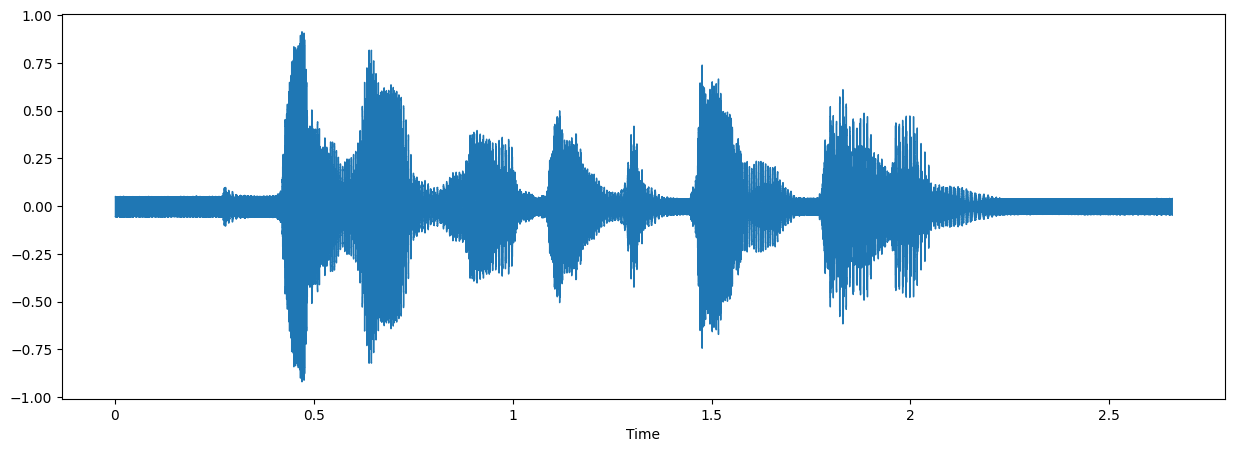

In [ ]:
filename = SAVEE + 'DC_a11.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

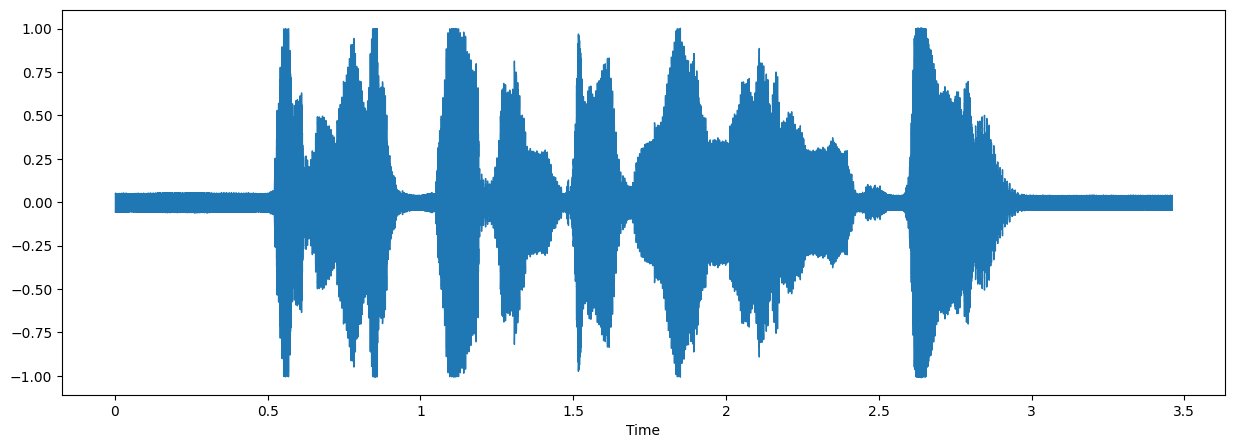

In [ ]:
filename = SAVEE + 'DC_h06.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

# RAVDESS

In [ ]:
!kaggle datasets download -d 'uwrfkaggler/ravdess-emotional-speech-audio' -p '/content'

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 427M/429M [00:15<00:00, 26.8MB/s]
100% 429M/429M [00:15<00:00, 29.4MB/s]


In [ ]:
!unzip -q '/content/ravdess-emotional-speech-audio' -d '/content/RAVDESS'

In [ ]:
!rm '/content/ravdess-emotional-speech-audio.zip'

In [ ]:
RAVDESS = '/content/RAVDESS'

In [ ]:
for dirpath, dirnames, filenames in os.walk(RAVDESS):
  print(dirpath)
  print(filenames)

/content/RAVDESS
[]
/content/RAVDESS/Actor_19
['03-01-07-01-02-02-19.wav', '03-01-08-01-01-02-19.wav', '03-01-04-01-02-02-19.wav', '03-01-04-02-02-01-19.wav', '03-01-04-01-01-01-19.wav', '03-01-07-01-01-02-19.wav', '03-01-07-02-02-01-19.wav', '03-01-01-01-02-02-19.wav', '03-01-04-01-02-01-19.wav', '03-01-02-01-02-02-19.wav', '03-01-06-02-02-02-19.wav', '03-01-06-02-01-01-19.wav', '03-01-01-01-01-02-19.wav', '03-01-02-01-01-02-19.wav', '03-01-02-02-02-02-19.wav', '03-01-02-02-02-01-19.wav', '03-01-06-02-01-02-19.wav', '03-01-03-02-02-01-19.wav', '03-01-07-02-01-01-19.wav', '03-01-04-01-01-02-19.wav', '03-01-07-01-02-01-19.wav', '03-01-06-01-02-01-19.wav', '03-01-08-02-01-02-19.wav', '03-01-03-02-01-01-19.wav', '03-01-05-01-01-02-19.wav', '03-01-05-01-01-01-19.wav', '03-01-06-02-02-01-19.wav', '03-01-08-01-02-02-19.wav', '03-01-03-02-01-02-19.wav', '03-01-05-02-02-01-19.wav', '03-01-07-01-01-01-19.wav', '03-01-05-01-02-02-19.wav', '03-01-02-02-01-02-19.wav', '03-01-08-01-01-01-19.wav', '

In [ ]:
shutil.rmtree('/content/RAVDESS/audio_speech_actors_01-24')

In [ ]:
for dirpath, dirnames, filenames in os.walk(RAVDESS):
  if filenames:
    source_folder = dirpath
    for filename in os.listdir(source_folder):
      shutil.move(os.path.join(source_folder, filename), RAVDESS)

In [ ]:
while True:
  removed_any = False
  for dirpath, dirnames, filenames in os.walk(RAVDESS, topdown=False):
    if not dirnames and not filenames:
      os.rmdir(dirpath)
      removed_any = True
  if not removed_any:
    break

In [ ]:
dir_list = os.listdir(RAVDESS)
dir_list.sort()
print(dir_list)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-

In [ ]:
RAVDESS = RAVDESS + '/'

emotion = []
gender = []
path = []
for f in dir_list:
  part = f.split('.')[0].split('-')
  emotion.append(int(part[2]))
  temp = int(part[6])
  if temp % 2 == 0:
    temp = 'female'
  else:
    temp = 'male'
  gender.append(temp)
  path.append(RAVDESS + f)

RAVDESS_df = pd.DataFrame(emotion)
RAVDESS_df = RAVDESS_df.replace({
    1: 'neutral',
    2: 'neutral',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
})
RAVDESS_df = pd.concat([pd.DataFrame(gender), RAVDESS_df], axis=1)
RAVDESS_df.columns = ['gender', 'emotion']
RAVDESS_df['labels'] = RAVDESS_df.gender + '_' + RAVDESS_df.emotion
RAVDESS_df['source'] = 'RAVDESS'
RAVDESS_df = pd.concat([RAVDESS_df, pd.DataFrame(path, columns=['path'])], axis=1)
RAVDESS_df = RAVDESS_df.drop(['gender', 'emotion'], axis=1)
RAVDESS_df.labels.value_counts()

,count
labels,
male_neutral,144
female_neutral,144
male_happy,96
female_happy,96
male_sad,96
female_sad,96
male_angry,96
female_angry,96
male_fear,96


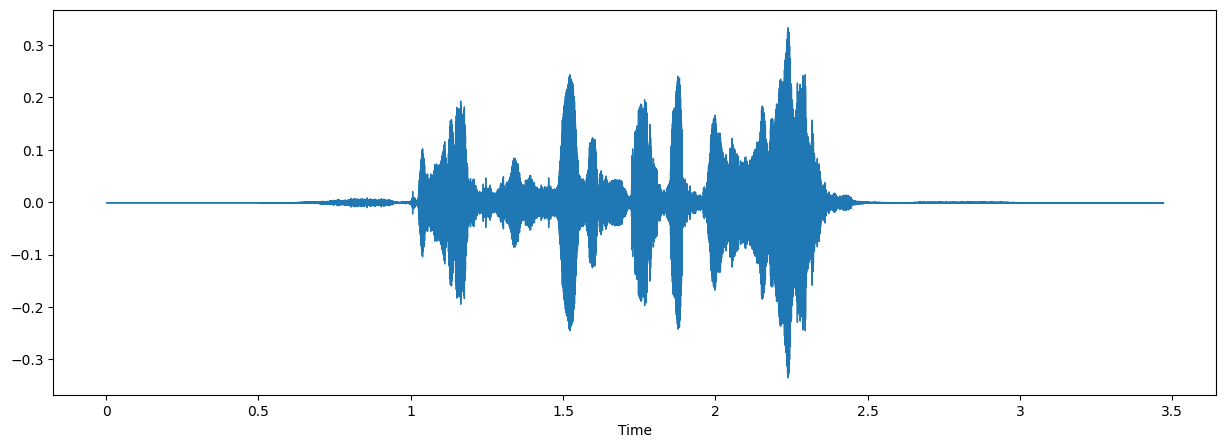

In [ ]:
filename = RAVDESS + '03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

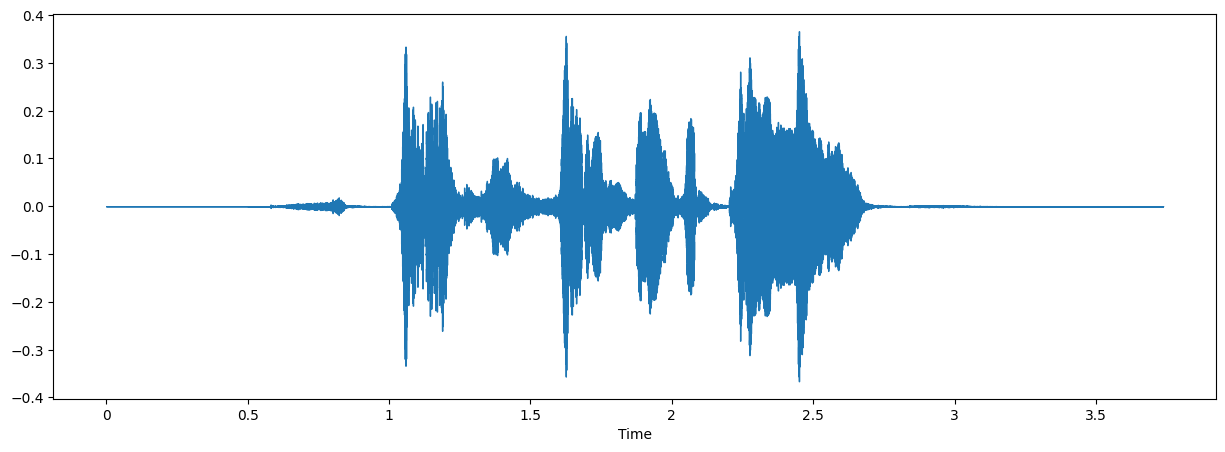

In [ ]:
filename = RAVDESS + '03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

# TESS

In [27]:
!kaggle datasets download -d 'ejlok1/toronto-emotional-speech-set-tess' -p '/content'

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 418M/428M [00:02<00:00, 187MB/s]
100% 428M/428M [00:02<00:00, 165MB/s]


In [28]:
!unzip -q '/content/toronto-emotional-speech-set-tess.zip' -d '/content/TESS'

In [29]:
!rm '/content/toronto-emotional-speech-set-tess.zip'

In [30]:
TESS = '/content/TESS'

In [31]:
for dirpath, dirnames, filenames in os.walk(TESS):
  print(dirpath)
  print(filenames)

/content/TESS
[]
/content/TESS/tess toronto emotional speech set data
[]
/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data
[]
/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry
['OAF_life_angry.wav', 'OAF_keen_angry.wav', 'OAF_wash_angry.wav', 'OAF_lose_angry.wav', 'OAF_jar_angry.wav', 'OAF_get_angry.wav', 'OAF_gaze_angry.wav', 'OAF_witch_angry.wav', 'OAF_hire_angry.wav', 'OAF_rot_angry.wav', 'OAF_phone_angry.wav', 'OAF_rat_angry.wav', 'OAF_talk_angry.wav', 'OAF_seize_angry.wav', 'OAF_dime_angry.wav', 'OAF_dip_angry.wav', 'OAF_shout_angry.wav', 'OAF_raise_angry.wav', 'OAF_sub_angry.wav', 'OAF_lease_angry.wav', 'OAF_sour_angry.wav', 'OAF_neat_angry.wav', 'OAF_pass_angry.wav', 'OAF_thin_angry.wav', 'OAF_cause_angry.wav', 'OAF_gas_angry.wav', 'OAF_came_angry.wav', 'OAF_mouse_angry.wav', 'OAF_wire_angry.wav', 'OAF_page_angry.wav', 'OAF_goal_angry.wav', 'OAF_date_angry.wav', 'OAF_road_angry.wav', 'O

In [32]:
shutil.rmtree('/content/TESS/tess toronto emotional speech set data')

In [33]:
for dirpath, dirnames, filenames in os.walk(TESS):
  if filenames:
    source_folder = dirpath
    for filename in os.listdir(source_folder):
      shutil.move(os.path.join(source_folder, filename), TESS)

In [34]:
while True:
  removed_any = False
  for dirpath, dirnames, filenames in os.walk(TESS, topdown=False):
    if not dirnames and not filenames:
      os.rmdir(dirpath)
      removed_any = True
  if not removed_any:
    break

In [26]:
shutil.rmtree('/content/TESS')

In [14]:
dir_list = os.listdir(TESS)
print(dir_list)

['YAF_sour_sad.wav', 'YAF_fit_happy.wav', 'OAF_which_sad.wav', 'OAF_ring_fear.wav', 'OAF_rag_ps.wav', 'YAF_kick_sad.wav', 'OAF_death_fear.wav', 'OAF_witch_disgust.wav', 'YAF_book_sad.wav', 'OAF_jug_fear.wav', 'OAF_tire_fear.wav', 'YAF_rain_ps.wav', 'OAF_life_neutral.wav', 'YAF_sail_fear.wav', 'OAF_life_angry.wav', 'YAF_shirt_fear.wav', 'YAF_lid_ps.wav', 'OAF_home_happy.wav', 'OAF_search_neutral.wav', 'OAF_nice_fear.wav', 'OAF_keen_angry.wav', 'OAF_keep_ps.wav', 'OAF_wash_angry.wav', 'YAF_gas_angry.wav', 'OAF_doll_ps.wav', 'OAF_bone_ps.wav', 'YAF_keg_disgust.wav', 'OAF_germ_happy.wav', 'YAF_vine_fear.wav', 'OAF_pool_ps.wav', 'OAF_cheek_fear.wav', 'YAF_cab_ps.wav', 'OAF_keen_happy.wav', 'YAF_mess_sad.wav', 'OAF_dip_disgust.wav', 'YAF_keen_happy.wav', 'OAF_sheep_sad.wav', 'OAF_chalk_neutral.wav', 'YAF_wheat_disgust.wav', 'YAF_perch_fear.wav', 'OAF_sail_fear.wav', 'OAF_lose_angry.wav', 'OAF_base_sad.wav', 'YAF_soap_angry.wav', 'OAF_jar_angry.wav', 'YAF_lore_happy.wav', 'YAF_tell_ps.wav', '

In [ ]:
TESS = TESS + '/'

path = []
emotion = []

for f in dir_list:
  part = f.split('.')[0].split('_')[-1]
  if part == 'angry':
    emotion.append('female_angry')
  elif part == 'disgust':
    emotion.append('female_disgust')
  elif part == 'fear':
    emotion.append('female_fear')
  elif part == 'happy':
    emotion.append('female_happy')
  elif part == 'neutral':
    emotion.append('female_neutral')
  elif part == 'ps':
    emotion.append('female_surprise')
  elif part == 'sad':
    emotion.append('female_sad')
  else:
    emotion.append('error')
  path.append(TESS + f)

TESS_df = pd.DataFrame(emotion, columns=['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df, pd.DataFrame(path, columns=['path'])], axis=1)
TESS_df.labels.value_counts()

,count
labels,
female_sad,400
female_fear,400
female_happy,400
female_neutral,400
female_surprise,400
female_angry,400
female_disgust,400


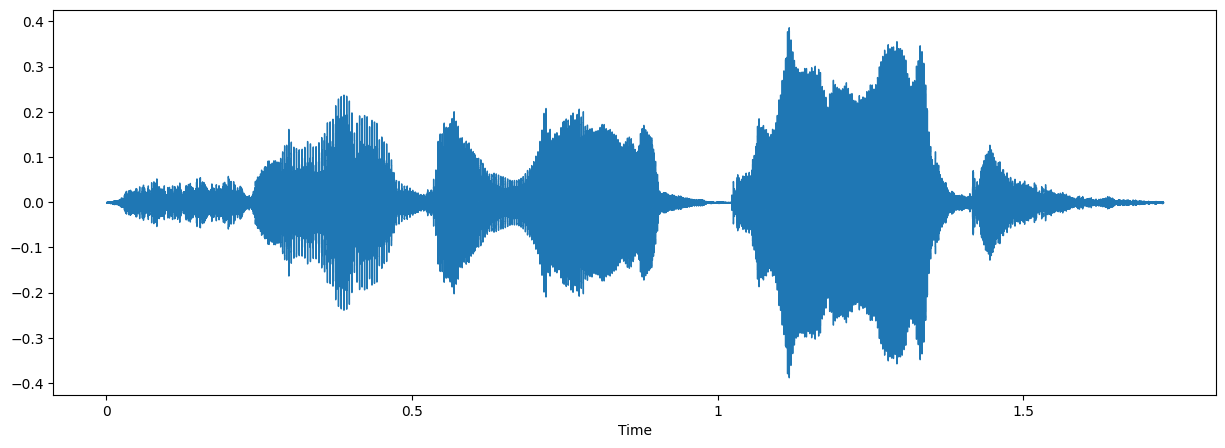

In [ ]:
filename = TESS + 'YAF_dog_fear.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

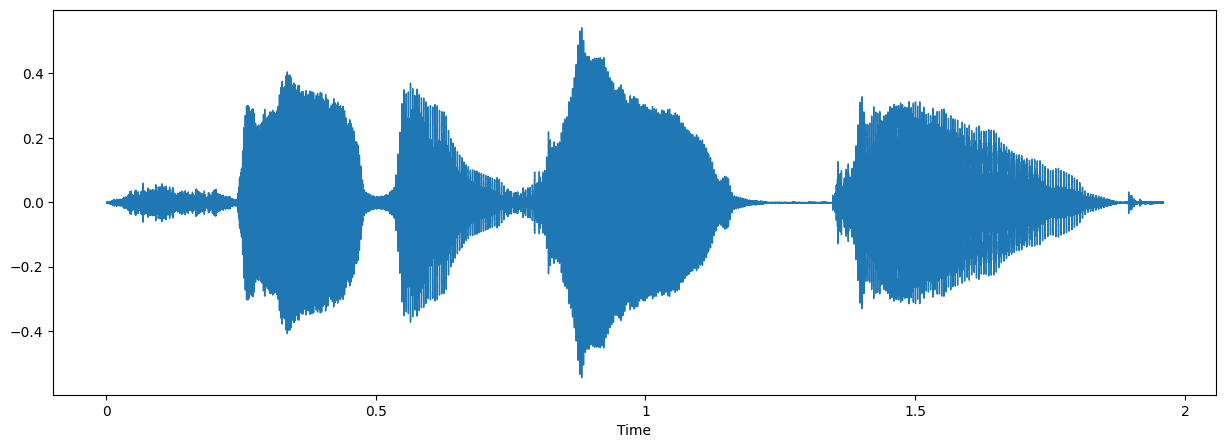

In [ ]:
filename = TESS + 'YAF_dog_happy.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

# CREMA-D

In [ ]:
!kaggle datasets download -d 'ejlok1/cremad' -p '/content'

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
100% 451M/451M [00:19<00:00, 24.7MB/s]
100% 451M/451M [00:19<00:00, 23.8MB/s]


In [ ]:
!unzip -q '/content/cremad.zip' -d '/content/CREMA-D'

In [ ]:
!rm '/content/cremad.zip'

In [ ]:
CREMA = '/content/CREMA-D'

In [ ]:
for dirpath, dirnames, filenames in os.walk(CREMA):
  print(dirpath)
  print(filenames)

/content/CREMA-D
[]
/content/CREMA-D/AudioWAV
['1009_TSI_NEU_XX.wav', '1025_MTI_SAD_XX.wav', '1080_TAI_ANG_XX.wav', '1022_TSI_DIS_XX.wav', '1045_TSI_DIS_XX.wav', '1045_TIE_NEU_XX.wav', '1051_ITH_NEU_XX.wav', '1004_ITS_NEU_XX.wav', '1041_TIE_SAD_XX.wav', '1011_WSI_HAP_XX.wav', '1052_TIE_ANG_XX.wav', '1085_IEO_FEA_LO.wav', '1004_ITH_FEA_XX.wav', '1040_TSI_FEA_XX.wav', '1003_IWL_NEU_XX.wav', '1012_IEO_SAD_MD.wav', '1024_IWL_SAD_XX.wav', '1067_IEO_FEA_MD.wav', '1083_IWL_HAP_XX.wav', '1041_TIE_DIS_XX.wav', '1001_MTI_SAD_XX.wav', '1035_DFA_DIS_XX.wav', '1075_MTI_DIS_XX.wav', '1071_DFA_NEU_XX.wav', '1061_IWW_ANG_XX.wav', '1008_IEO_SAD_LO.wav', '1060_DFA_SAD_XX.wav', '1026_TIE_FEA_XX.wav', '1045_IEO_SAD_HI.wav', '1063_IWW_ANG_XX.wav', '1086_ITS_SAD_XX.wav', '1073_TIE_FEA_XX.wav', '1031_ITH_ANG_XX.wav', '1040_IWW_SAD_XX.wav', '1042_IWW_DIS_XX.wav', '1016_IEO_DIS_HI.wav', '1034_ITS_ANG_XX.wav', '1010_IEO_DIS_HI.wav', '1071_IOM_NEU_XX.wav', '1077_IWL_FEA_XX.wav', '1053_TSI_DIS_XX.wav', '1063_ITH_

In [ ]:
for dirpath, dirnames, filenames in os.walk(CREMA):
  if filenames:
    source_folder = dirpath
    for filename in os.listdir(source_folder):
      shutil.move(os.path.join(source_folder, filename), CREMA)

In [ ]:
while True:
  removed_any = False
  for dirpath, dirnames, filenames in os.walk(CREMA, topdown=False):
    if not dirnames and not filenames:
      os.rmdir(dirpath)
      removed_any = True
  if not removed_any:
    break

In [ ]:
dir_list = os.listdir(CREMA)
print(dir_list)

['1009_TSI_NEU_XX.wav', '1025_MTI_SAD_XX.wav', '1080_TAI_ANG_XX.wav', '1022_TSI_DIS_XX.wav', '1045_TSI_DIS_XX.wav', '1045_TIE_NEU_XX.wav', '1051_ITH_NEU_XX.wav', '1004_ITS_NEU_XX.wav', '1041_TIE_SAD_XX.wav', '1011_WSI_HAP_XX.wav', '1052_TIE_ANG_XX.wav', '1085_IEO_FEA_LO.wav', '1004_ITH_FEA_XX.wav', '1040_TSI_FEA_XX.wav', '1003_IWL_NEU_XX.wav', '1012_IEO_SAD_MD.wav', '1024_IWL_SAD_XX.wav', '1067_IEO_FEA_MD.wav', '1083_IWL_HAP_XX.wav', '1041_TIE_DIS_XX.wav', '1001_MTI_SAD_XX.wav', '1035_DFA_DIS_XX.wav', '1075_MTI_DIS_XX.wav', '1071_DFA_NEU_XX.wav', '1061_IWW_ANG_XX.wav', '1008_IEO_SAD_LO.wav', '1060_DFA_SAD_XX.wav', '1026_TIE_FEA_XX.wav', '1045_IEO_SAD_HI.wav', '1063_IWW_ANG_XX.wav', '1086_ITS_SAD_XX.wav', '1073_TIE_FEA_XX.wav', '1031_ITH_ANG_XX.wav', '1040_IWW_SAD_XX.wav', '1042_IWW_DIS_XX.wav', '1016_IEO_DIS_HI.wav', '1034_ITS_ANG_XX.wav', '1010_IEO_DIS_HI.wav', '1071_IOM_NEU_XX.wav', '1077_IWL_FEA_XX.wav', '1053_TSI_DIS_XX.wav', '1063_ITH_FEA_XX.wav', '1069_DFA_FEA_XX.wav', '1023_IOM_

In [ ]:
CREMA = CREMA + '/'

gender = []
emotion = []
path = []

female = {1002, 1003, 1004, 1006, 1007, 1008, 1009, 1010, 1012, 1013,
          1018, 1020, 1021, 1024, 1025, 1028, 1029, 1030, 1037, 1043,
          1046, 1047, 1049, 1052, 1053, 1054, 1055, 1056, 1058, 1060,
          1061, 1063, 1072, 1073, 1074, 1075, 1076, 1078, 1079, 1082,
          1084, 1089, 1091}

emotion_map = {
    'SAD': 'sad',
    'ANG': 'angry',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happy',
    'NEU': 'neutral'
}

for f in dir_list:
  part = f.split('_')
  if int(part[0]) in female:
    temp = 'female'
  else:
    temp = 'male'
  gender.append(temp)
  emotion_label = emotion_map.get(part[2], None)
  if emotion_label:
    emotion.append(f'{temp}_{emotion_label}')
  else:
    emotion.append('error')
  path.append(CREMA + f)

CREMA_df = pd.DataFrame(emotion, columns=['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path, columns=['path'])], axis=1)
CREMA_df.labels.value_counts()

,count
labels,
male_angry,671
male_disgust,671
male_sad,671
male_happy,671
male_fear,671
female_sad,600
female_angry,600
female_fear,600
female_disgust,600


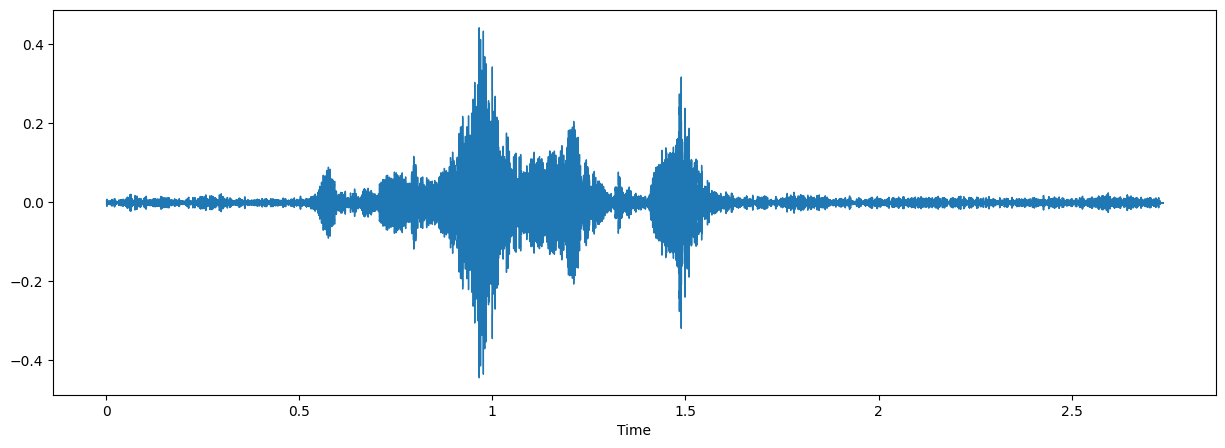

In [ ]:
filename = CREMA + '1012_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

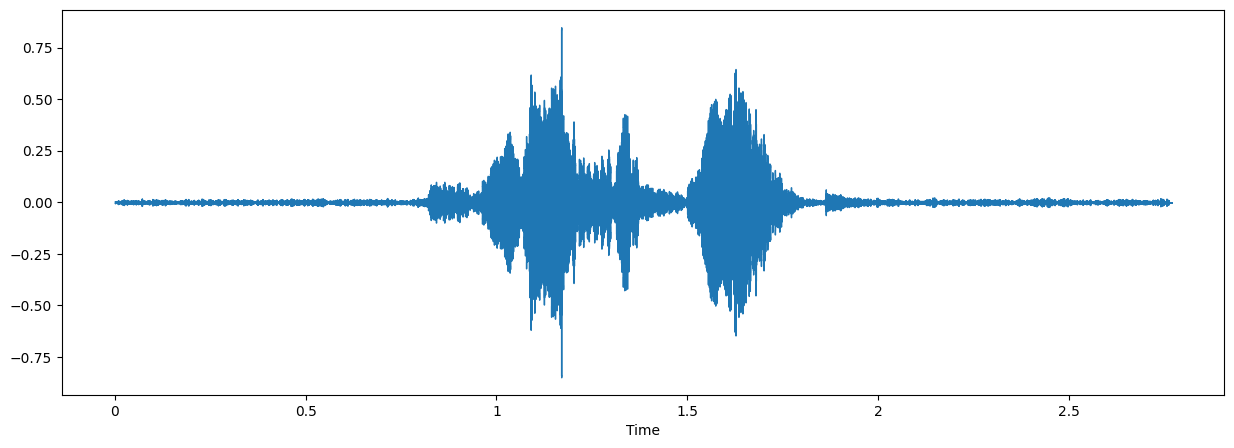

In [ ]:
filename = CREMA + '1012_IEO_FEA_HI.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(filename)

# Concatenation

In [ ]:
df = pd.concat([SAVEE_df, RAVDESS_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()

labels
female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_sad            827
male_happy          827
male_disgust        827
male_fear           827
male_angry          827
female_surprise     496
male_surprise       156
Name: count, dtype: int64


,labels,source,path
0,male_sad,SAVEE,/content/SAVEE/JE_sa14.wav
1,male_happy,SAVEE,/content/SAVEE/JK_h05.wav
2,male_neutral,SAVEE,/content/SAVEE/KL_n25.wav
3,male_disgust,SAVEE,/content/SAVEE/KL_d12.wav
4,male_neutral,SAVEE,/content/SAVEE/KL_n28.wav


In [ ]:
df.to_csv('dummy_data.csv', index=False)

In [ ]:
files.download('dummy_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>